In [1]:
import pandas as pd
import yfinance as yf
import tensorflow as tf

In [2]:
import datetime as dt
data = yf.Ticker('MXN=X')
df = data.history(period='max').reset_index()
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].dt.strftime('%Y-%m-%d')
df = df.drop(columns=['Open', 'Volume', 'Dividends', 'Stock Splits', 'High', 'Low'])
df.set_index('Date')
df.dropna(axis=1)

,Date,Close
0,2003-12-01,11.358000
1,2003-12-02,11.290000
2,2003-12-03,11.245000
3,2003-12-04,11.188000
4,2003-12-05,11.197000
...,...,...
5235,2024-01-04,17.012150
5236,2024-01-05,17.008600
5237,2024-01-08,16.880939
5238,2024-01-09,16.833700


(array([-1000.,     0.,  1000.,  2000.,  3000.,  4000.,  5000.,  6000.]),
 [Text(-1000.0, 0, '2020-03-12'),
  Text(0.0, 0, '2003-12-01'),
  Text(1000.0, 0, '2007-10-04'),
  Text(2000.0, 0, '2011-08-10'),
  Text(3000.0, 0, '2015-06-10'),
  Text(4000.0, 0, '2019-04-10'),
  Text(5000.0, 0, '2023-02-09'),
  Text(6000.0, 0, '')])

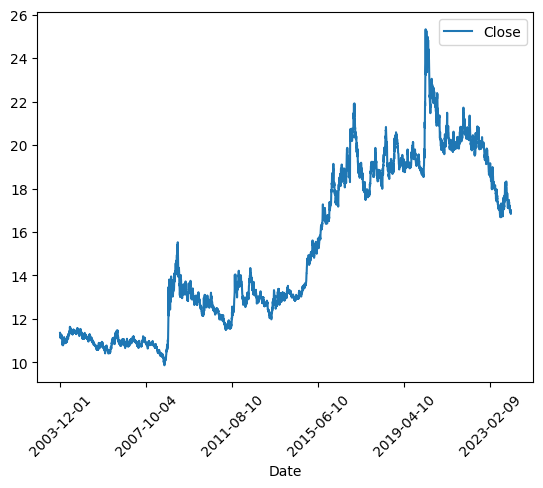

In [3]:
import matplotlib.pyplot as plt
df.set_index('Date').plot()
plt.xticks(rotation=45)

In [4]:
X= df['Close'].to_numpy(dtype='float32')
len(X), X[0], X[-1]

(5240, 11.358, 16.98791)

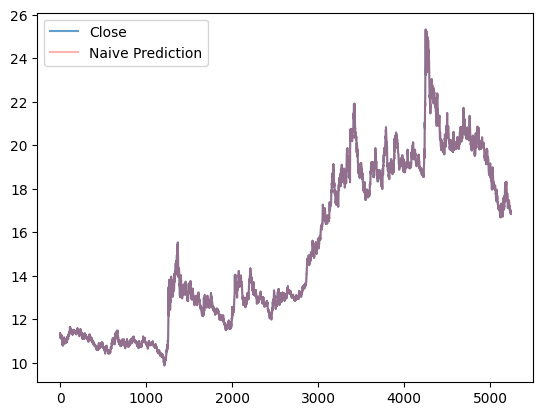

In [5]:
df_shifted = df['Close'].shift(1)
df.plot(kind='line', alpha=0.7)
df_shifted.plot(c='r', alpha=0.3)
plt.legend(['Close', 'Naive Prediction'])

MODEL 1
---------------------------------------------------------------------------------------------

In [6]:
HORIZON = 1
WINDOW_SIZE = 7

In [7]:
dataset = tf.keras.utils.timeseries_dataset_from_array(X, X[WINDOW_SIZE:], sequence_length=WINDOW_SIZE, sequence_stride=1, sampling_rate=1, batch_size=len(X))
for batch in dataset:
    inputs, targets = batch

inputs[0], targets[0], len(targets)

(<tf.Tensor: shape=(7,), dtype=float32, numpy=
 array([11.358, 11.29 , 11.245, 11.188, 11.197, 11.202, 11.162],
       dtype=float32)>,
 <tf.Tensor: shape=(), dtype=float32, numpy=11.207>,
 5233)

In [8]:
inputs_train = inputs[:round(len(inputs)*0.8)]
targets_train = targets[:round(len(inputs)*0.8)]
len(inputs_train), len(targets_train)

(4186, 4186)

In [9]:
inputs_test = inputs[round(len(inputs)*0.8):]
targets_test = targets[round(len(inputs)*0.8):]
len(inputs_test), len(targets_test)

(1047, 1047)

In [10]:
import os 
os.chdir('F:/Python/proyectos')
def model_checkpoint(model_name, save_path='model_experiments'):
    return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                              verbose=0,
                                              save_best_only=True,
                                              monitor='val_loss')

In [11]:
tf.random.set_seed(24)

model_1 = tf.keras.Sequential(name='model_1')
model_1.add(tf.keras.layers.Dense(128, activation='relu'))
model_1.add(tf.keras.layers.Dense(HORIZON, activation='linear'))

model_1.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['mae', 'mse'])

model_1.build(input_shape=inputs_train.shape)



In [12]:
model_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (4186, 128)               1024      
                                                                 
 dense_1 (Dense)             (4186, 1)                 129       
                                                                 
Total params: 1153 (4.50 KB)
Trainable params: 1153 (4.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
history = model_1.fit(x=inputs_train,
            y=targets_train,
            epochs=100,
            verbose=0,
            batch_size=128,
            validation_data=(inputs_test, targets_test),
            callbacks=[model_checkpoint(model_name=model_1.name)])

INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


INFO:tensorflow:Assets written to: model_experiments\model_1\assets


In [14]:
history = pd.DataFrame(history.history)


<Axes: >

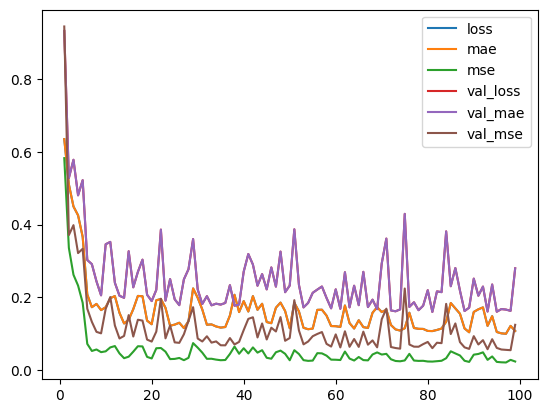

In [15]:
history[1:].plot()

In [16]:
model_1 = tf.keras.models.load_model("F:/Python/proyectos/model_experiments/model_1/")

In [17]:
forecast_1 = model_1.predict(inputs_test)
forecast_1 = tf.squeeze(forecast_1)



33/33 [==============================] - 0s 516us/step


In [18]:
forecast_1[-10:], df.set_index('Date')[-10:]

(<tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([16.94651 , 16.911615, 16.893787, 16.900229, 16.903694, 16.918375,
        16.937946, 16.94563 , 16.908377, 16.860569], dtype=float32)>,
                 Close
 Date                 
 2023-12-28  16.913601
 2023-12-29  16.951200
 2024-01-01  16.963440
 2024-01-02  16.962509
 2024-01-03  17.019400
 2024-01-04  17.012150
 2024-01-05  17.008600
 2024-01-08  16.880939
 2024-01-09  16.833700
 2024-01-10  16.987909)

<Figure size 1000x700 with 0 Axes>

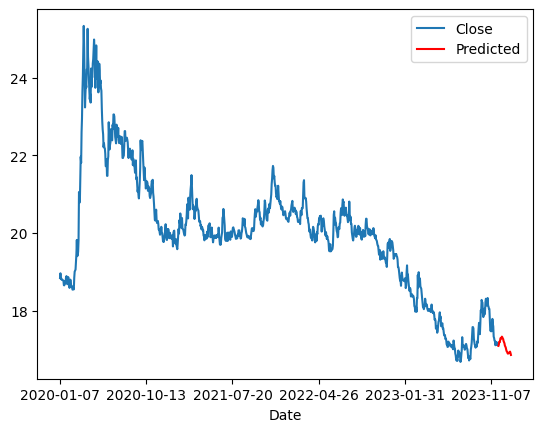

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
df.set_index('Date')[-len(targets_test): -30].plot()
plt.plot(range(len(targets_test) - 30, len(targets_test)), forecast_1[-30:],  c='r')
plt.legend(['Close', 'Predicted'])

In [20]:
df.shape[0]

5240

Model 2
------------------------------------------------------------------------------------------------

In [21]:
HORIZON = 7
WINDOW_SIZE = 30

targets_7 = [X[WINDOW_SIZE + i: WINDOW_SIZE + HORIZON + i] for i in range(0, len(X) - (HORIZON + WINDOW_SIZE))]
targets_7 = tf.squeeze(targets_7)

len(targets_7), targets_7[-1]


(5203,
 <tf.Tensor: shape=(7,), dtype=float32, numpy=
 array([16.96344, 16.96251, 17.0194 , 17.01215, 17.0086 , 16.88094,
        16.8337 ], dtype=float32)>)

In [22]:
dataset_2 = tf.keras.utils.timeseries_dataset_from_array(X, X[WINDOW_SIZE:], sequence_length=WINDOW_SIZE, sequence_stride=1, sampling_rate=1, batch_size=len(X))
for batch in dataset_2:
    inputs, targets = batch

inputs = inputs[:len(targets_7)]
len(inputs), inputs[-1]

(5203,
 <tf.Tensor: shape=(30,), dtype=float32, numpy=
 array([17.21968, 17.11074, 17.1896 , 17.19519, 17.1865 , 17.11386,
        17.1586 , 17.121  , 17.2828 , 17.3763 , 17.18876, 17.4541 ,
        17.3583 , 17.28746, 17.47205, 17.3471 , 17.3699 , 17.30376,
        17.26226, 17.19038, 17.2212 , 17.1627 , 17.0598 , 17.13317,
        17.03127, 16.97837, 16.9752 , 16.9736 , 16.9136 , 16.9512 ],
       dtype=float32)>)

In [23]:
inputs_train = inputs[:round(len(inputs)*0.8)]
targets_train = targets_7[:round(len(inputs)*0.8)]

len(inputs_train), len(targets_train)

(4162, 4162)

In [24]:
inputs_test = inputs[round(len(inputs)*0.8):]
targets_test = targets_7[round(len(inputs)*0.8):]
len(inputs_test), len(targets_test)

(1041, 1041)

In [25]:
tf.random.set_seed(24)

input_layer = tf.keras.Input(shape=inputs[0].shape)

x = tf.keras.layers.Dense(128, activation='relu')(input_layer)

output_layer = tf.keras.layers.Dense(HORIZON)(x)

model_2 = tf.keras.Model(inputs=input_layer, outputs=output_layer, name='model_2')

model_2.summary()




Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 30)]              0         
                                                                 
 dense_2 (Dense)             (None, 128)               3968      
                                                                 
 dense_3 (Dense)             (None, 7)                 903       
                                                                 
Total params: 4871 (19.03 KB)
Trainable params: 4871 (19.03 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
model_2.compile(loss=tf.keras.losses.MAE, optimizer=tf.keras.optimizers.Adam())

history_2 = model_2.fit(x=inputs_train, y=targets_train, validation_data=(inputs_test, targets_test),
            epochs=100, verbose=0, batch_size=128, callbacks=[model_checkpoint(model_name=model_2.name)])

INFO:tensorflow:Assets written to: model_experiments\model_2\assets


INFO:tensorflow:Assets written to: model_experiments\model_2\assets


INFO:tensorflow:Assets written to: model_experiments\model_2\assets


INFO:tensorflow:Assets written to: model_experiments\model_2\assets


INFO:tensorflow:Assets written to: model_experiments\model_2\assets


INFO:tensorflow:Assets written to: model_experiments\model_2\assets


INFO:tensorflow:Assets written to: model_experiments\model_2\assets


INFO:tensorflow:Assets written to: model_experiments\model_2\assets


INFO:tensorflow:Assets written to: model_experiments\model_2\assets


INFO:tensorflow:Assets written to: model_experiments\model_2\assets


INFO:tensorflow:Assets written to: model_experiments\model_2\assets


INFO:tensorflow:Assets written to: model_experiments\model_2\assets


INFO:tensorflow:Assets written to: model_experiments\model_2\assets


INFO:tensorflow:Assets written to: model_experiments\model_2\assets


INFO:tensorflow:Assets written to: model_experiments\model_2\assets


INFO:tensorflow:Assets written to: model_experiments\model_2\assets


INFO:tensorflow:Assets written to: model_experiments\model_2\assets


INFO:tensorflow:Assets written to: model_experiments\model_2\assets


INFO:tensorflow:Assets written to: model_experiments\model_2\assets


INFO:tensorflow:Assets written to: model_experiments\model_2\assets


INFO:tensorflow:Assets written to: model_experiments\model_2\assets


INFO:tensorflow:Assets written to: model_experiments\model_2\assets


INFO:tensorflow:Assets written to: model_experiments\model_2\assets


INFO:tensorflow:Assets written to: model_experiments\model_2\assets


INFO:tensorflow:Assets written to: model_experiments\model_2\assets


INFO:tensorflow:Assets written to: model_experiments\model_2\assets


INFO:tensorflow:Assets written to: model_experiments\model_2\assets


INFO:tensorflow:Assets written to: model_experiments\model_2\assets


INFO:tensorflow:Assets written to: model_experiments\model_2\assets


INFO:tensorflow:Assets written to: model_experiments\model_2\assets


INFO:tensorflow:Assets written to: model_experiments\model_2\assets


INFO:tensorflow:Assets written to: model_experiments\model_2\assets


INFO:tensorflow:Assets written to: model_experiments\model_2\assets


INFO:tensorflow:Assets written to: model_experiments\model_2\assets


INFO:tensorflow:Assets written to: model_experiments\model_2\assets


INFO:tensorflow:Assets written to: model_experiments\model_2\assets


INFO:tensorflow:Assets written to: model_experiments\model_2\assets


INFO:tensorflow:Assets written to: model_experiments\model_2\assets


INFO:tensorflow:Assets written to: model_experiments\model_2\assets


INFO:tensorflow:Assets written to: model_experiments\model_2\assets


<Axes: >

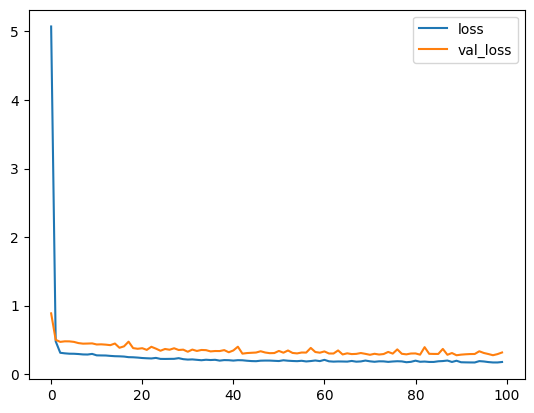

In [27]:
history_2 = pd.DataFrame(history_2.history)

history_2.plot()

In [28]:
model_2 = tf.keras.models.load_model('model_experiments/model_2/')
model_2.evaluate(inputs_test, targets_test)

33/33 [==============================] - 0s 626us/step - loss: 0.2762


0.2762306332588196

33/33 [==============================] - 0s 532us/step


<Figure size 1000x700 with 0 Axes>

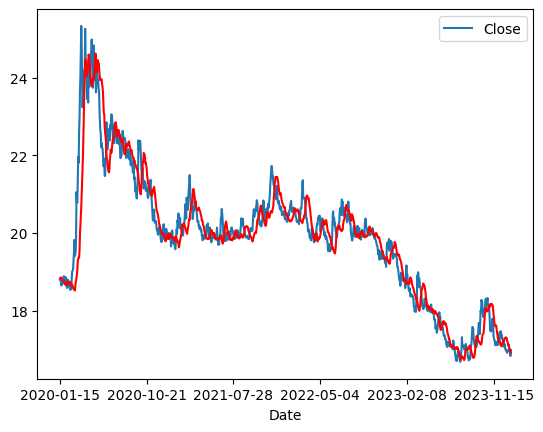

In [29]:
forecast_2 = model_2.predict(inputs_test)
plt.figure(figsize=(10,7))
df.set_index('Date')[-len(targets_test):].plot()
plt.plot(tf.reduce_mean(forecast_2, axis=1), c='r')


Model 3
----------------------------------------------------------------------------

In [60]:
HORIZON = 1
WINDOW_SIZE = 6

In [61]:
dataset = tf.keras.utils.timeseries_dataset_from_array(X, X[WINDOW_SIZE:], sequence_length=WINDOW_SIZE, sequence_stride=1, sampling_rate=1, batch_size=len(X))
for batch in dataset:
    inputs, targets = batch

inputs[0], targets[0], len(targets)

(<tf.Tensor: shape=(6,), dtype=float32, numpy=array([11.358, 11.29 , 11.245, 11.188, 11.197, 11.202], dtype=float32)>,
 <tf.Tensor: shape=(), dtype=float32, numpy=11.162>,
 5234)

In [62]:
inputs_train = inputs[:round(len(inputs)*0.8)]
targets_train = targets[:round(len(inputs)*0.8)]

len(inputs_train), len(targets_train)

(4187, 4187)

In [63]:
inputs_test = inputs[round(len(inputs)*0.8):]
targets_test = targets[round(len(inputs)*0.8):]
len(inputs_test), len(targets_test)

(1047, 1047)

In [64]:
exp_dim_layer = tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=1))

In [73]:
model_3 = tf.keras.Sequential(name='model_3')

model_3.add(exp_dim_layer)
model_3.add(tf.keras.layers.Conv1D(filters=128, kernel_size=WINDOW_SIZE, padding='causal',
                           activation='relu'))
model_3.add(tf.keras.layers.Dropout(0.2))
model_3.add(tf.keras.layers.Conv1D(filters=64, kernel_size=WINDOW_SIZE, padding='causal',
                           activation='relu'))
model_3.add(tf.keras.layers.Dense(HORIZON))

model_3.build(input_shape=inputs_train.shape)

model_3.summary() 

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_2 (Lambda)           multiple                  0         
                                                                 
 conv1d_8 (Conv1D)           (4187, 1, 128)            4736      
                                                                 
 dropout_1 (Dropout)         (4187, 1, 128)            0         
                                                                 
 conv1d_9 (Conv1D)           (4187, 1, 64)             49216     
                                                                 
 dense_11 (Dense)            (4187, 1, 1)              65        
                                                                 
Total params: 54017 (211.00 KB)
Trainable params: 54017 (211.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [74]:
tf.random.set_seed(24)
model_3.compile(loss='mae', optimizer=tf.keras.optimizers.Adam(learning_rate=0.01))
model_3.fit(inputs_train, targets_train, epochs= 100, verbose=1,
            validation_data=(inputs_test, targets_test), 
            callbacks=[model_checkpoint(model_name=model_3.name)])

Epoch 1/100
101/131 [======================>.......] - ETA: 0s - loss: 3.8082 INFO:tensorflow:Assets written to: model_experiments\model_3\assets


INFO:tensorflow:Assets written to: model_experiments\model_3\assets


131/131 [==============================] - 4s 31ms/step - loss: 3.6407 - val_loss: 2.5508
Epoch 2/100
131/131 [==============================] - 0s 1ms/step - loss: 2.8971 - val_loss: 6.5939
Epoch 3/100
131/131 [==============================] - 0s 1ms/step - loss: 2.7385 - val_loss: 7.2313
Epoch 4/100
131/131 [==============================] - 0s 1ms/step - loss: 2.6400 - val_loss: 6.8732
Epoch 5/100
131/131 [==============================] - 0s 1ms/step - loss: 2.4944 - val_loss: 7.0073
Epoch 6/100
131/131 [==============================] - 0s 1ms/step - loss: 2.4962 - val_loss: 7.0465
Epoch 7/100
131/131 [==============================] - 0s 1ms/step - loss: 2.4957 - val_loss: 7.2325
Epoch 8/100
131/131 [==============================] - 0s 1ms/step - loss: 2.5015 - val_loss: 6.8671
Epoch 9/100
131/131 [==============================] - 0s 1ms/step - loss: 2.4950 - val_loss: 7.4051
Epoch 10/100
131/131 [==============================] - 0s 1ms/step - loss: 2.4992 - val_loss: 6.7976


In [75]:
model_3 = tf.keras.models.load_model('model_experiments/model_3/')
model_3.evaluate(inputs_test, targets_test)

33/33 [==============================] - 0s 716us/step - loss: 2.5508


2.550842761993408

33/33 [==============================] - 0s 613us/step


<Figure size 1000x700 with 0 Axes>

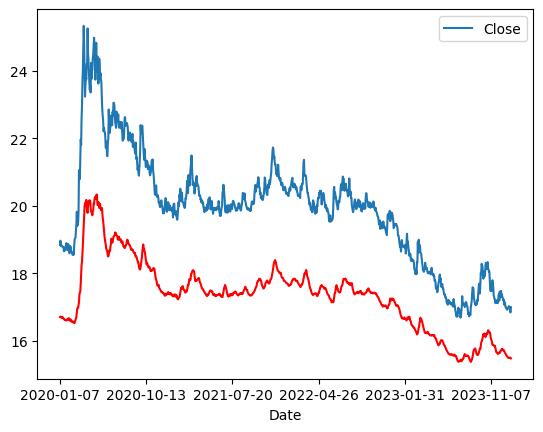

In [76]:
forecast_3 = model_3.predict(inputs_test)
plt.figure(figsize=(10,7))
df.set_index('Date')[-len(targets_test):].plot()
plt.plot(tf.reduce_mean(forecast_3, axis=1), c='r')

Model 4
------------------------------------------------------------
Adding economic and political variables: